In [35]:
import pandas as pd

df=pd.read_csv('./PLANT TON_EFFICIENCY/TableData23_12.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          4441 non-null   object 
 1   RT            4441 non-null   float64
 2   kW_Tot        4441 non-null   float64
 3   kW_RT         4441 non-null   float64
 4   CH Load       4441 non-null   float64
 5   CH1           4441 non-null   int64  
 6   CH2           4441 non-null   int64  
 7   CH3           4441 non-null   int64  
 8   CH4           4441 non-null   int64  
 9   kW_CHH        4441 non-null   float64
 10  kW_CHP        4441 non-null   float64
 11  kW_CHS        4441 non-null   int64  
 12  kW_CDS        4441 non-null   float64
 13  kW_CT         4441 non-null   float64
 14  GPM           4441 non-null   float64
 15  DeltaCHW      4441 non-null   float64
 16  CHWS          4441 non-null   float64
 17  CHWR          4441 non-null   float64
 18  DeltaCDW      4441 non-null 

In [36]:
df['Time'] = pd.to_datetime(df['Time'])

# Check the data type to ensure conversion was successful
print(df.dtypes['Time'])

datetime64[ns]


In [37]:
df.describe()

,Time,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,WBT,DeltaCT,Hz_ CHP,Hz_CHS,Hz_CDS,Hz_CT,Precent_CH,Precent_ CHP,Precent_CDS,Precent_CT
count,4441,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.0,4441.0,4441.000000,...,4441.000000,4441.000000,4441.000000,4441.0,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,2023-12-16 12:16:39.504615936,290.173294,246.176019,0.830782,50.192637,0.963071,0.002702,0.0,0.0,170.466246,...,74.308647,-4.898807,47.685656,0.0,47.873452,47.301621,66.021392,10.859491,15.080973,8.037874
min,2023-12-01 00:00:00,0.000000,24.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.200000,...,32.000000,-53.300000,0.000000,0.0,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,2023-12-08 18:40:00,217.600000,200.700000,0.780000,37.700000,1.000000,0.000000,0.0,0.0,128.200000,...,72.700000,-6.500000,47.000000,0.0,47.000000,46.500000,64.100000,7.800000,11.600000,6.400000
50%,2023-12-16 11:40:00,296.500000,241.700000,0.825000,49.000000,1.000000,0.000000,0.0,0.0,166.400000,...,73.900000,-5.200000,48.000000,0.0,48.000000,47.500000,69.100000,9.800000,13.700000,7.400000
75%,2023-12-24 07:00:00,374.000000,301.300000,0.890000,65.800000,1.000000,0.000000,0.0,0.0,223.300000,...,76.500000,-3.500000,48.000000,0.0,49.000000,48.500000,73.900000,11.800000,15.900000,8.800000
max,2024-01-01 00:00:00,554.300000,425.300000,2.303000,93.800000,1.000000,1.000000,0.0,0.0,318.100000,...,81.300000,8.200000,48.000000,0.0,49.000000,49.000000,83.600000,99.100000,52.100000,27.000000
std,NaN,99.176253,68.898539,0.205593,19.121132,0.188608,0.051917,0.0,0.0,64.791197,...,4.942632,5.800146,1.109863,0.0,2.653694,2.654557,14.150622,6.530144,6.485772,3.094253


In [38]:
df.isnull().sum()

Time            0
RT              0
kW_Tot          0
kW_RT           0
CH Load         0
CH1             0
CH2             0
CH3             0
CH4             0
kW_CHH          0
kW_CHP          0
kW_CHS          0
kW_CDS          0
kW_CT           0
GPM             0
DeltaCHW        0
CHWS            0
CHWR            0
DeltaCDW        0
CDHI            0
CDLO            0
WBT             0
DeltaCT         0
Hz_ CHP         0
Hz_CHS          0
Hz_CDS          0
Hz_CT           0
Precent_CH      0
Precent_ CHP    0
Precent_CDS     0
Precent_CT      0
dtype: int64

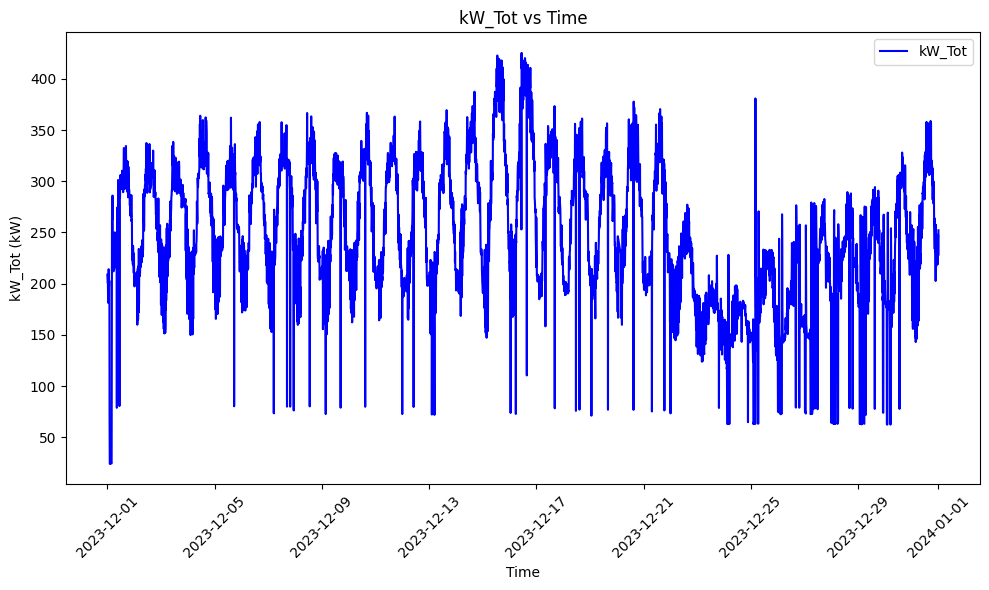

In [39]:
import matplotlib.pyplot as plt
# Plotting kW_Tot vs Time in a line plot
plt.figure(figsize=(10,6))
plt.plot(df['Time'], df['kW_Tot'], label='kW_Tot', color='b')

# Adding title and labels
plt.title('kW_Tot vs Time')
plt.xlabel('Time')
plt.ylabel('kW_Tot (kW)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [40]:
dft=df

# Set 'Time' as the index for easier slicing based on dates
dft.set_index('Time', inplace=True)


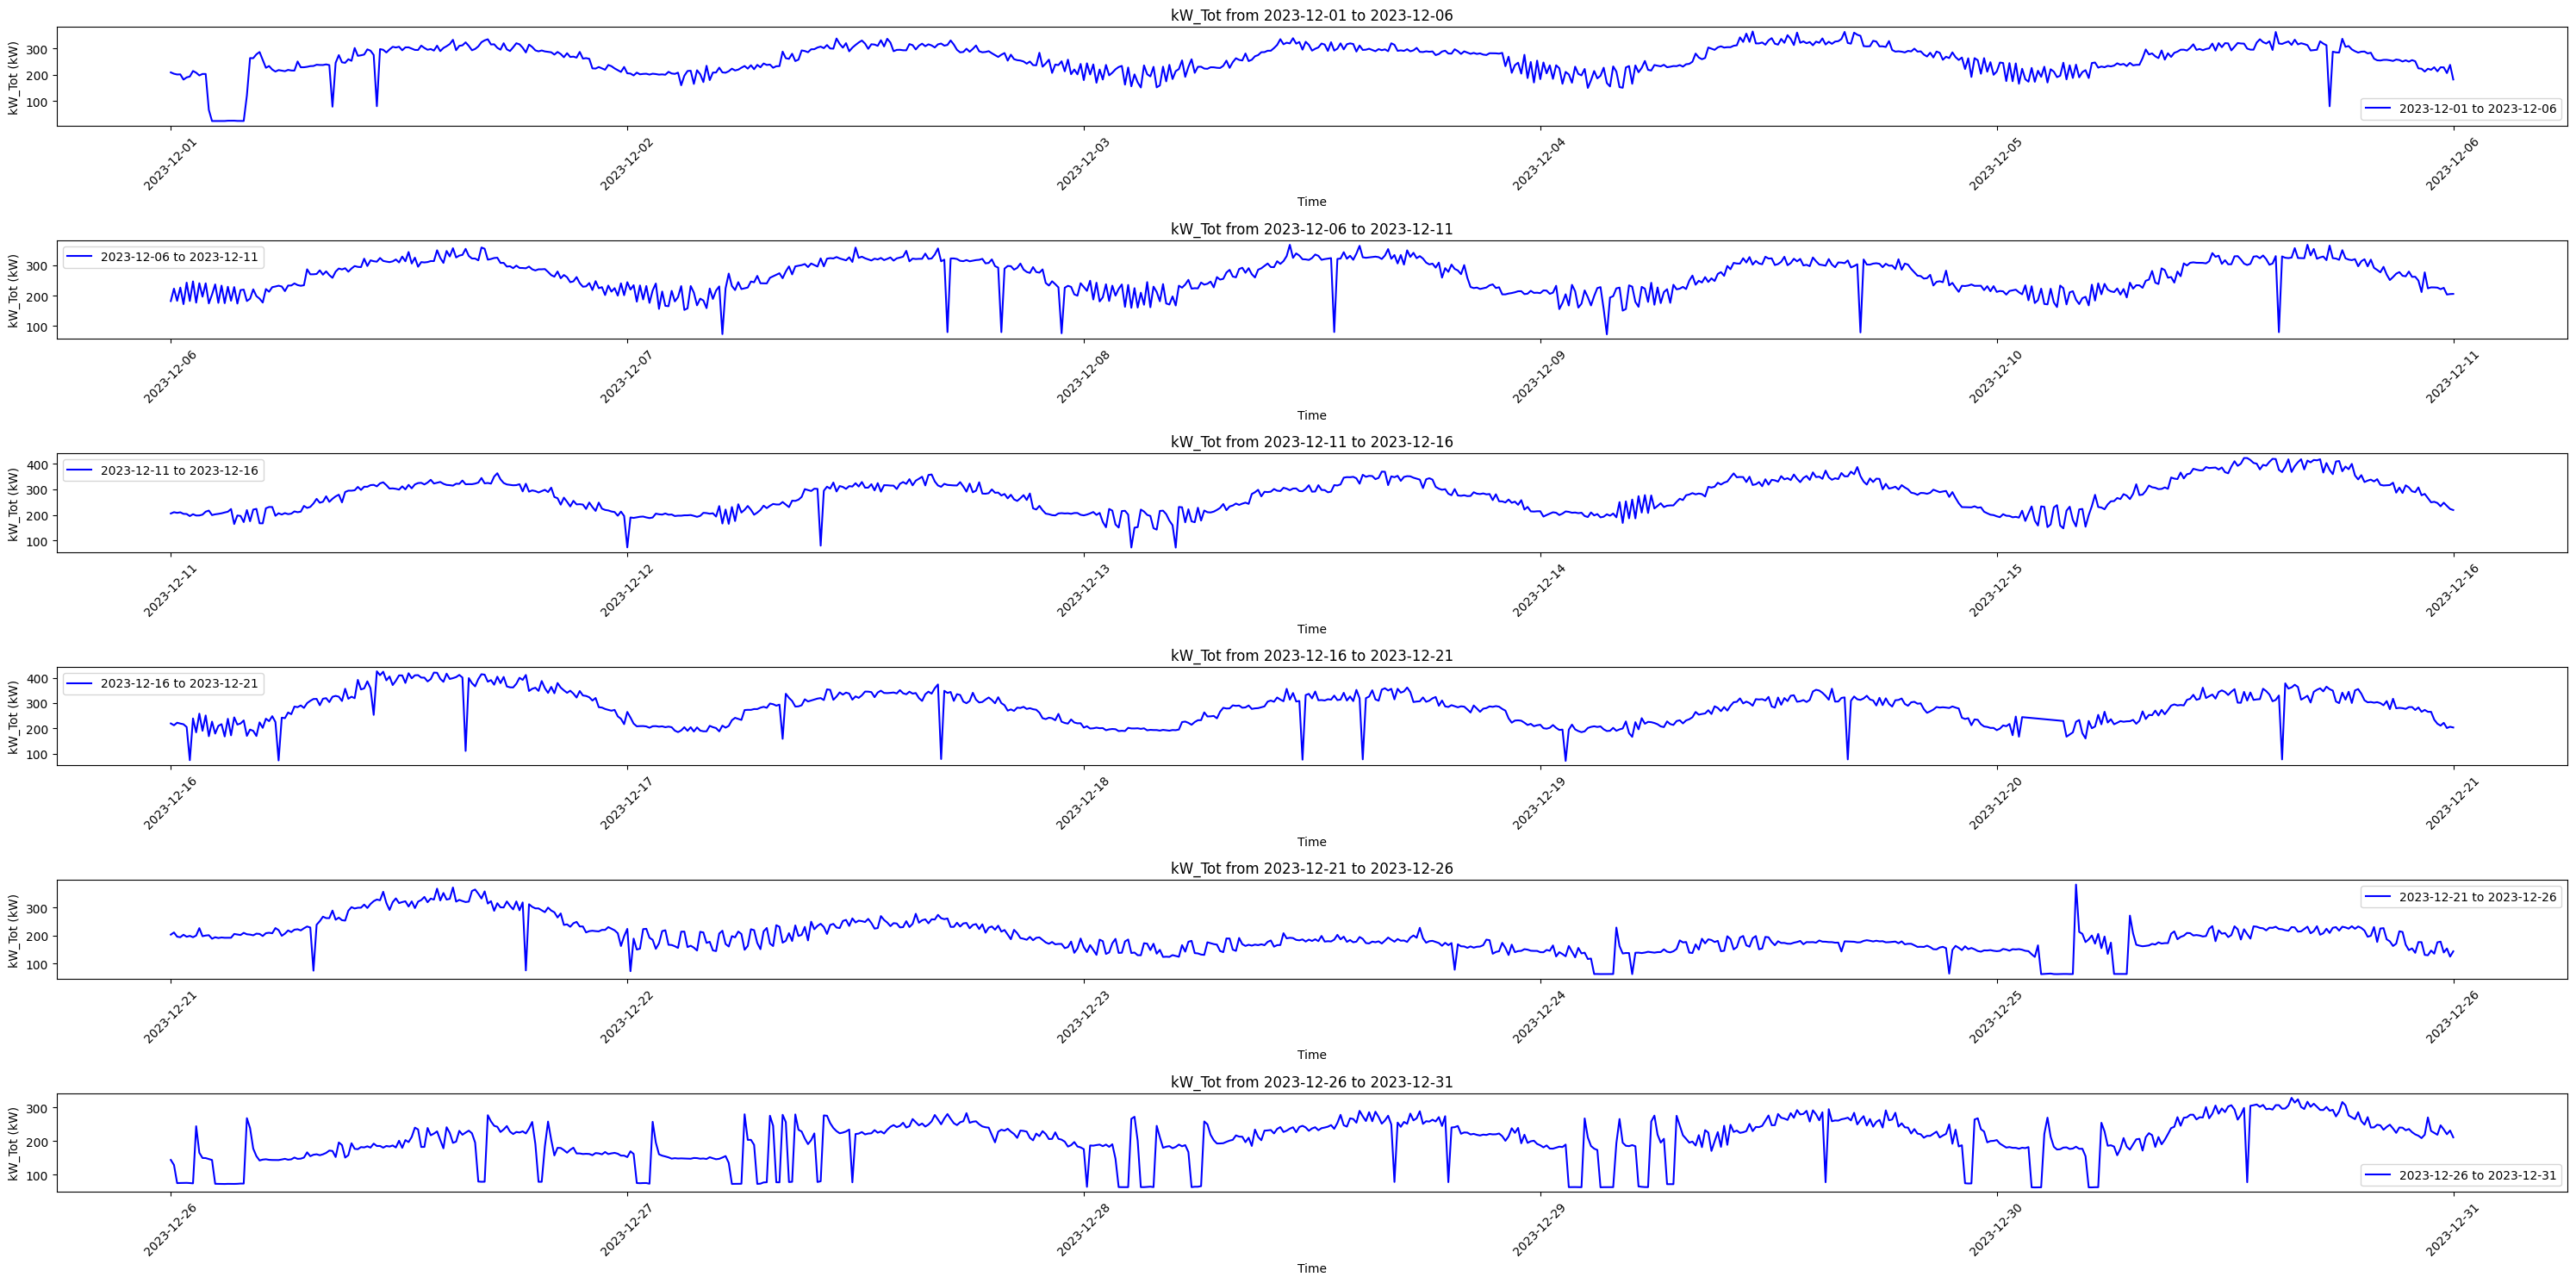

In [42]:

# Define the start and end date for each 10-day interval in a month
intervals = pd.date_range(start=dft.index.min(), end=dft.index.max(), freq='5D')

# Create subplots for each interval
fig, axes = plt.subplots(len(intervals)-1, 1, figsize=(30, 15))

for i in range(len(intervals)-1):
    start_date = intervals[i]
    end_date = intervals[i + 1]
    
    # Slice the data for the current interval
    df_interval = dft.loc[start_date:end_date]

    # Plot kW_Tot for the current interval
    axes[i].plot(df_interval.index, df_interval['kW_Tot'], label=f'{start_date.date()} to {end_date.date()}', color='b')
    
    # Add labels and title for each subplot
    axes[i].set_title(f'kW_Tot from {start_date.date()} to {end_date.date()}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('kW_Tot (kW)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
